In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('NetflixOriginals.csv', encoding = 'ISO-8859-1')
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [4]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [5]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [20]:
df['Premiere'] = df['Premiere'].str.extract(r'([A-Za-z]+ \d{1,2}, \d{4})')[0]
df['Premiere'] = pd.to_datetime(df['Premiere'], errors='coerce')
df['year']    = df['Premiere'].dt.year
df['month']   = df['Premiere'].dt.month_name()
df['weekday'] = df['Premiere'].dt.day_name()

df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,August,Monday
1,Dark Forces,Thriller,2019-08-05,81,2.6,Spanish,2019,August,Monday
2,The App,Science fiction/Drama,2019-08-05,79,2.6,Italian,2019,August,Monday
3,The Open House,Horror thriller,2019-08-05,94,3.2,English,2019,August,Monday
4,Kaali Khuhi,Mystery,2019-08-05,90,3.4,Hindi,2019,August,Monday


In [8]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


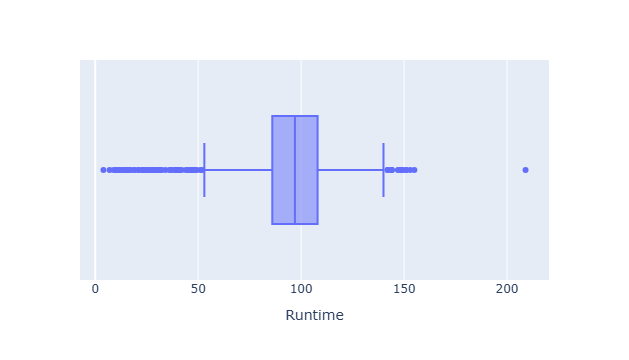

In [9]:
df_temp = df[['Runtime', 'Title', 'Language']].sort_values(by='Runtime', ascending=False).head(3)
fig = px.box(df, x='Runtime', hover_data = df[['Title','Language']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

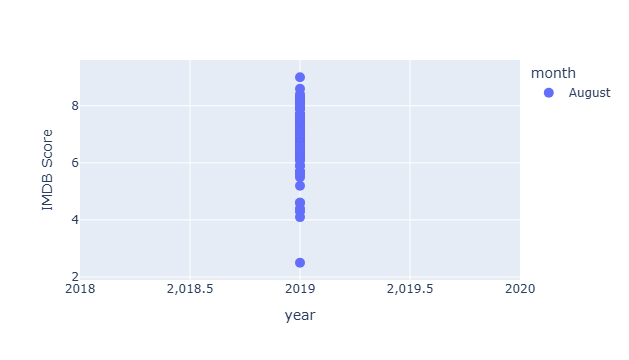

In [21]:
df_doc = df[ ((df['year']== 2019) | (df['year']== 2020) & ((df['month']==('January'))| (df['month']==('February'))| (df['month']==('March'))|(df['month']==('April')) | (df['month']==('May'))| (df['month']==('June')))) & (df['Genre']=="Documentary") ]
fig = px.scatter(df_doc, x='year' , y='IMDB Score', color='month')
fig.update_traces(marker_size=10)
fig.show()

In [23]:
top_imdb_english = df[df['Language'] == 'English'].copy()
top_imdb_english = top_imdb_english.sort_values(by='IMDB Score', ascending=False).head(3)
top_imdb_english = top_imdb_english[['Language', 'Genre', 'Title', 'IMDB Score']]
top_imdb_english

,Language,Genre,Title,IMDB Score
583,English,Documentary,David Attenborough: A Life on Our Planet,9.0
581,English,One-man show,Springsteen on Broadway,8.5
579,English,Concert Film,Taylor Swift: Reputation Stadium Tour,8.4


In [26]:
df_hindi = df[df["Language"] == "Hindi"]
df_hindi.Runtime.value_counts()
df_hindi.Runtime.mean()

np.float64(115.78787878787878)

In [34]:
df['Genre'].value_counts()
df['Genre'].value_counts().sum()
genre = df['Genre'].value_counts()
genre

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Action-adventure                          1
Animation / Science Fiction               1
Anthology/Dark comedy                     1
Musical / Short                           1
Animation/Christmas/Comedy/Adventure      1
Name: count, Length: 115, dtype: int64

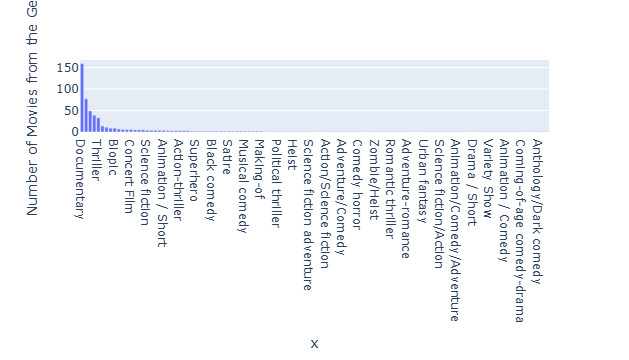

In [33]:
fig = px.bar(genre, x= genre.index, y=genre.values, labels={'y':'Number of Movies from the Genre','index':'Genres'})
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [37]:
df.Language.unique()
df.Language.value_counts()

Language
English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Korean                          6
Japanese                        6
Turkish                         5
English/Spanish                 5
German                          5
Dutch                           3
Polish                          3
Marathi                         3
English/Japanese                2
Filipino                        2
Thai                            2
English/Mandarin                2
English/Hindi                   2
Malay                           1
Norwegian                       1
Swedish                         1
Spanish/Basque                  1
Spanish/Catalan                 1
English/Swedish                 1
English/Taiwanese/Mandarin      1
Thia/English                    1
Georgian                        1
Benga

In [38]:
df_top_lang = df.Language.value_counts().nlargest(3)

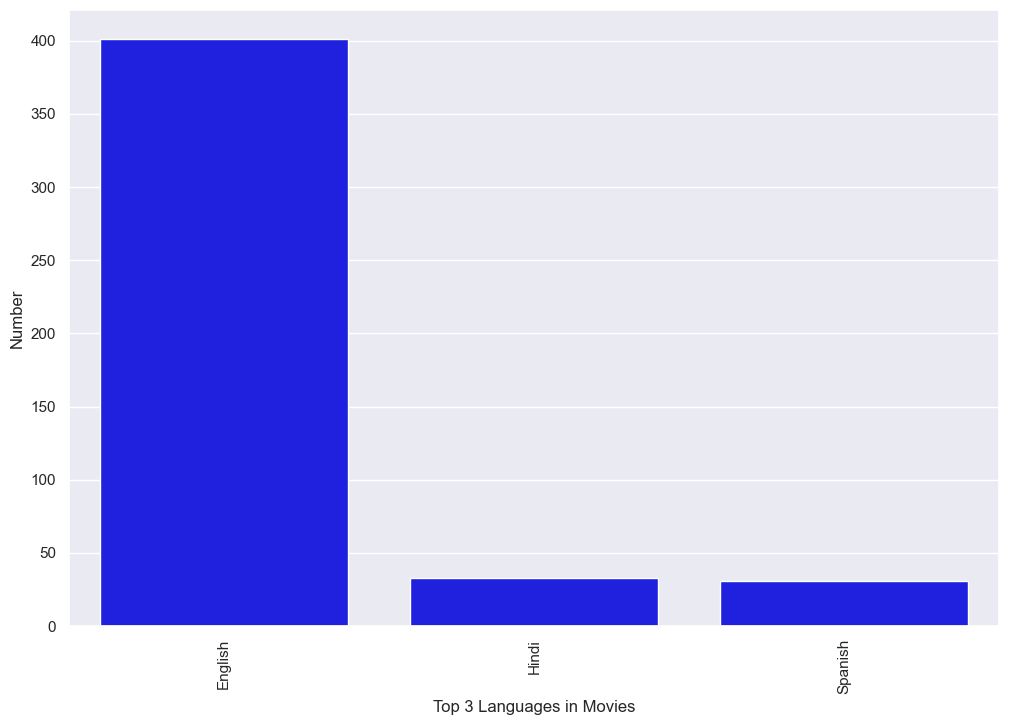

In [56]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_top_lang.index, y=df_top_lang.values, color='blue')
plt.xlabel('Top 3 Languages in Movies')
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.show()

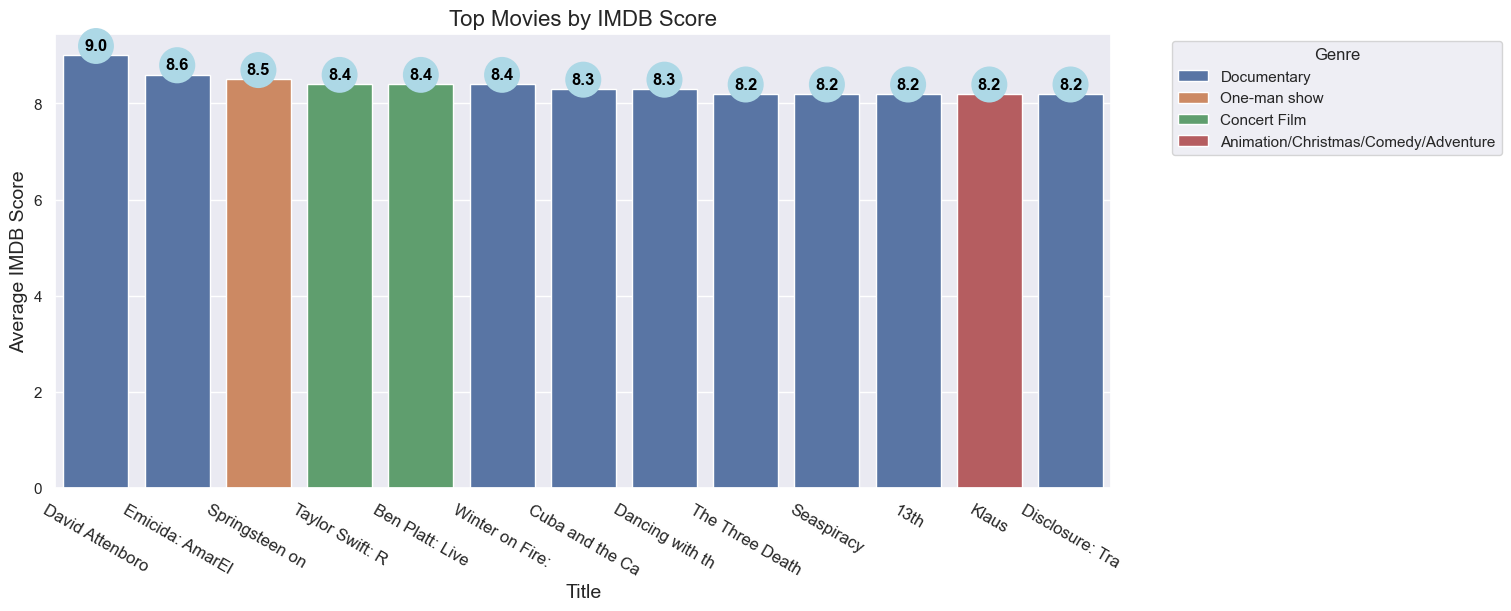

In [57]:
df_temp = df.sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:13,:]
fig, ax = plt.subplots(1, 1, figsize=(15, 6), constrained_layout=True)
sns.barplot(x='Title', y='IMDB Score', data=df_temp, hue='Genre', ax=ax)
for i in ax.patches:
    if i.get_height() > 0:
        ax.text(x = i.get_x() + i.get_width()/2, 
                y = i.get_height() + 0.1,
                s = f"{i.get_height():.1f}", # Formatted to 1 decimal place
                ha = 'center', size = 12, weight = 'bold', 
                color = 'black', # Changed to black for better visibility inside lightblue
                bbox = dict(boxstyle="circle,pad=0.3", fc='lightblue', ec='lightblue', lw=2))
ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticks(range(len(df_temp)))
ax.set_xticklabels([i[:15] for i in df_temp['Title']], fontsize=12, rotation=-30)
plt.title('Top Movies by IMDB Score', fontsize=16)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [58]:
df[['IMDB Score','Runtime']].corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


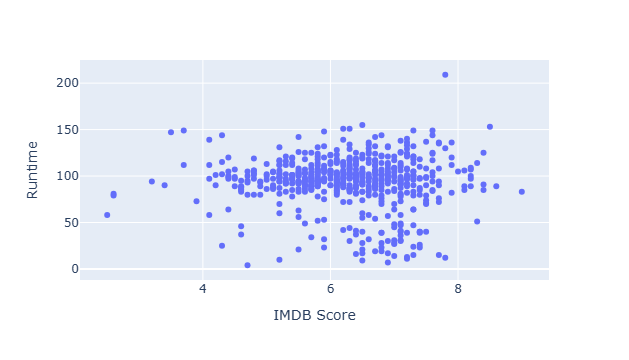

In [59]:
fig = px.scatter(df, x='IMDB Score', y='Runtime')
fig.show()

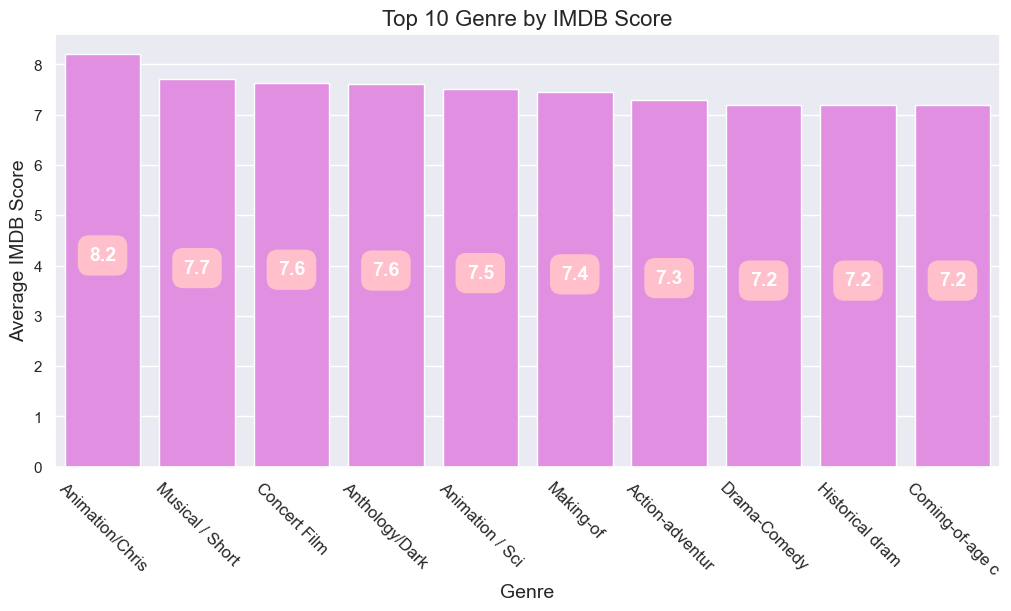

In [62]:
df_temp = df.groupby(['Genre'])[['IMDB Score']].mean().sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:10,:]
fig, ax = plt.subplots(1, 1, figsize=(10, 6), constrained_layout=True)
sns.barplot(x='Genre', y='IMDB Score', data=df_temp, color='violet', ax=ax)
for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, 
            y = i.get_height()/2,
            s = f"{round(i.get_height(),1)}", 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticks(range(len(df_temp)))
ax.set_xticklabels([i[:15] for i in df_temp['Genre']], fontsize=12, rotation=-45)
plt.title('Top 10 Genre by IMDB Score', fontsize=16)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12328\3260303302.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




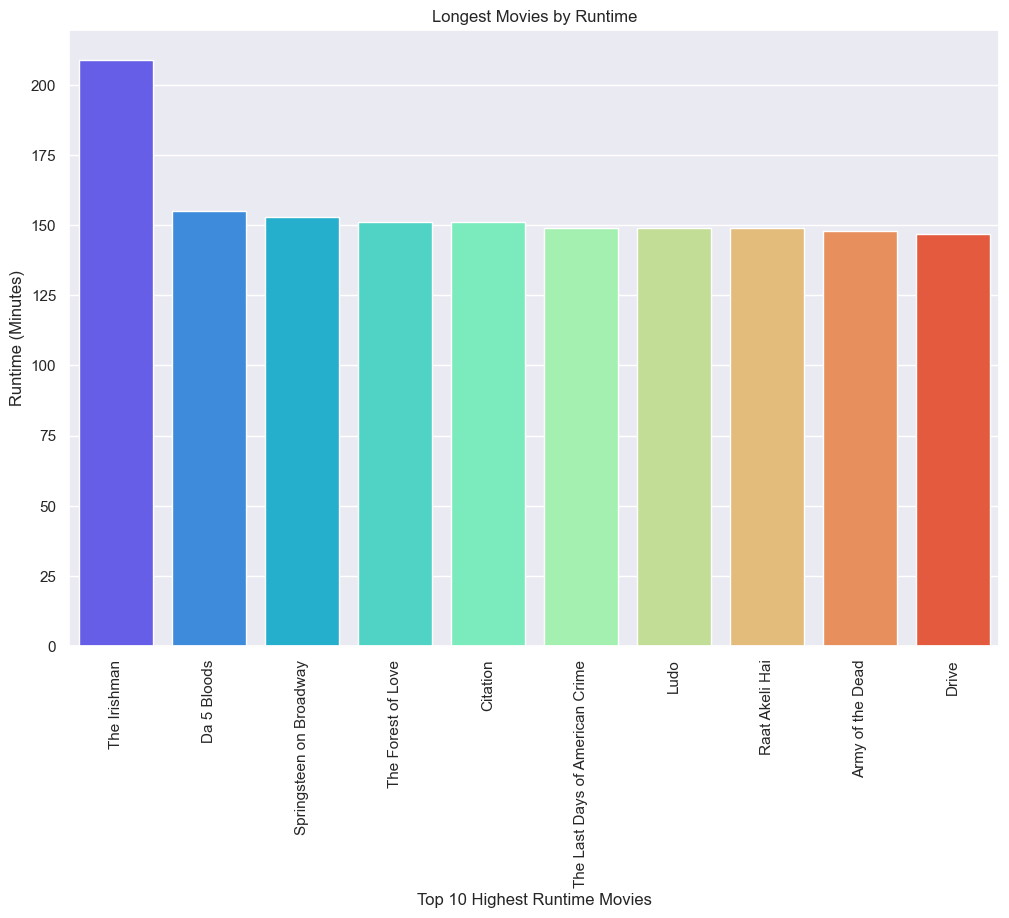

In [64]:
df_temp = df.groupby(['Title'])[['Runtime']].mean().sort_values(by='Runtime', ascending=False).reset_index().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x="Title", y="Runtime", data=df_temp, palette='rainbow')
plt.xlabel('Top 10 Highest Runtime Movies')
plt.xticks(rotation=90)
plt.ylabel('Runtime (Minutes)')
plt.title('Longest Movies by Runtime')
plt.show()

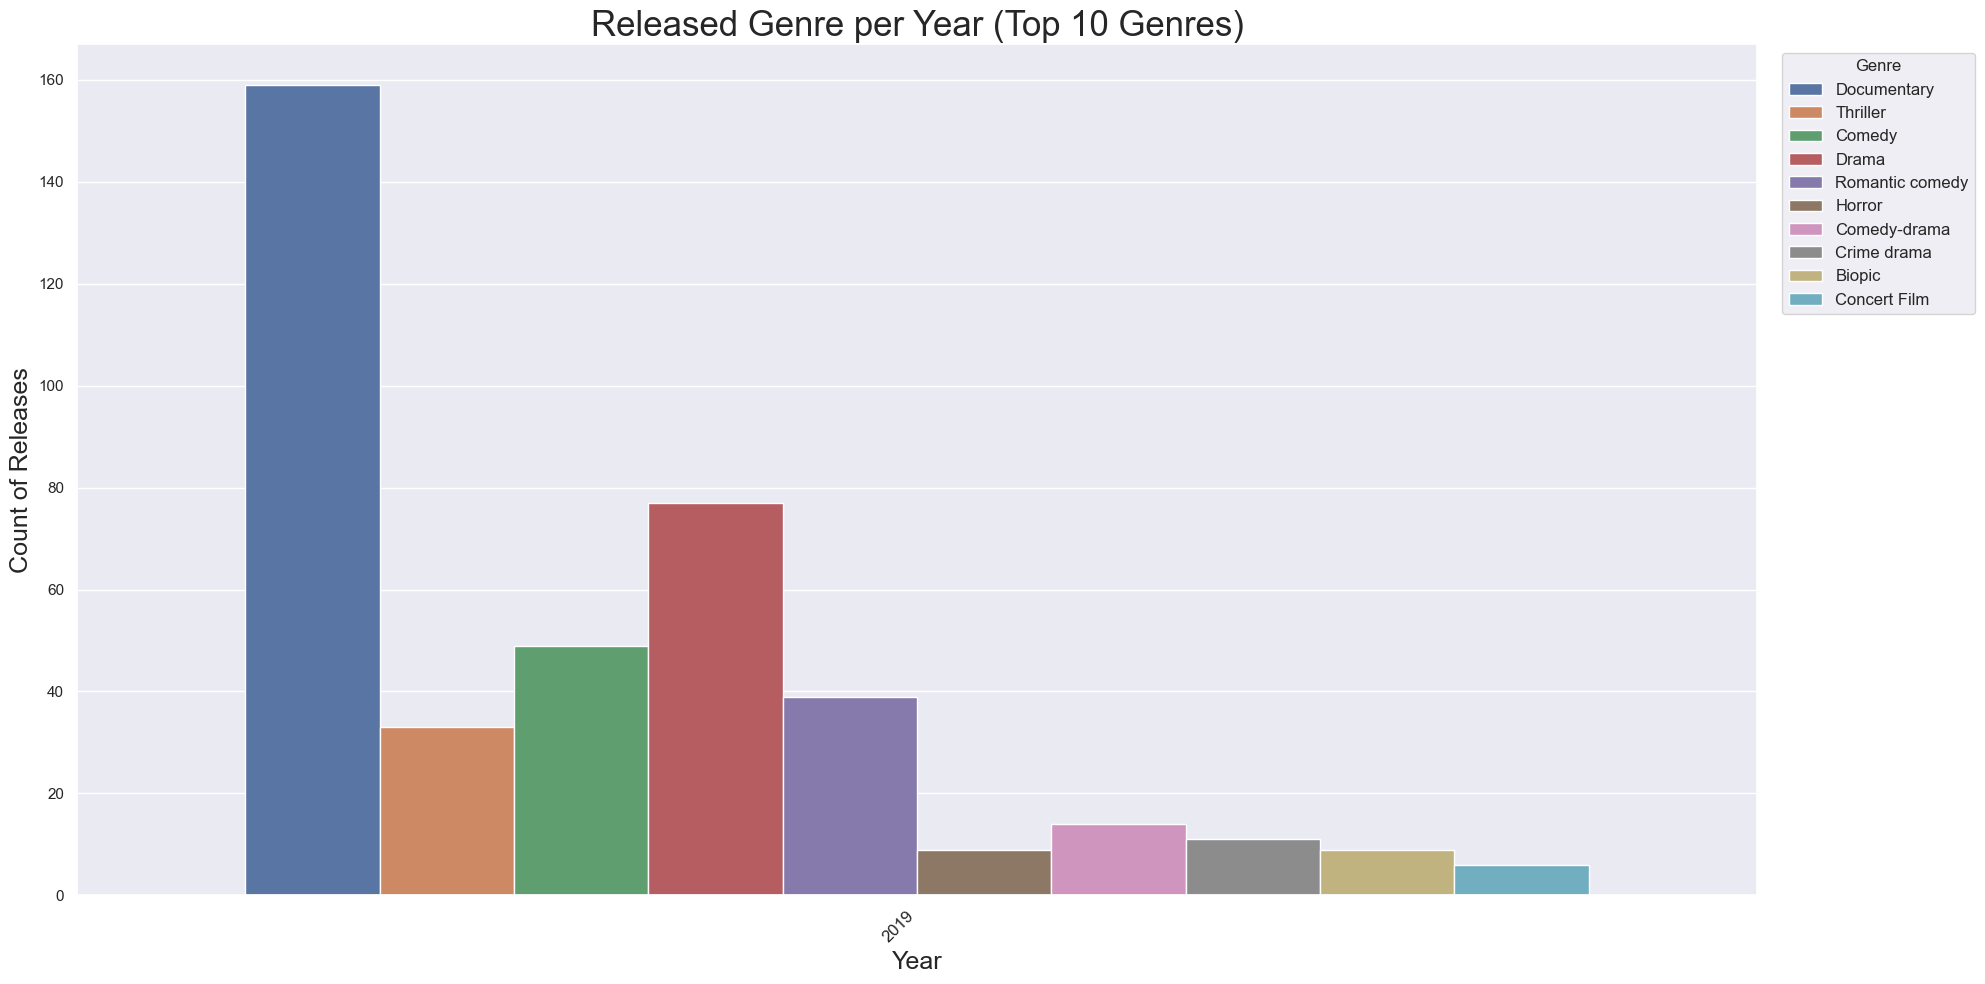

In [73]:
top_genres_list = df.groupby('Genre').sum(numeric_only=True).sort_values(by='IMDB Score', ascending=False).head(10).index
df_filtered = df[df['Genre'].isin(top_genres_list)].sort_values('year')
plt.figure(figsize=(20, 10))
sns.countplot(data=df_filtered, x='year', hue='Genre')
plt.title('Released Genre per Year (Top 10 Genres)', size=25)
plt.xlabel('Year', size=18)
plt.ylabel('Count of Releases', size=18)
plt.xticks(rotation=45, ha='right', size=12)
plt.legend(title='Genre', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

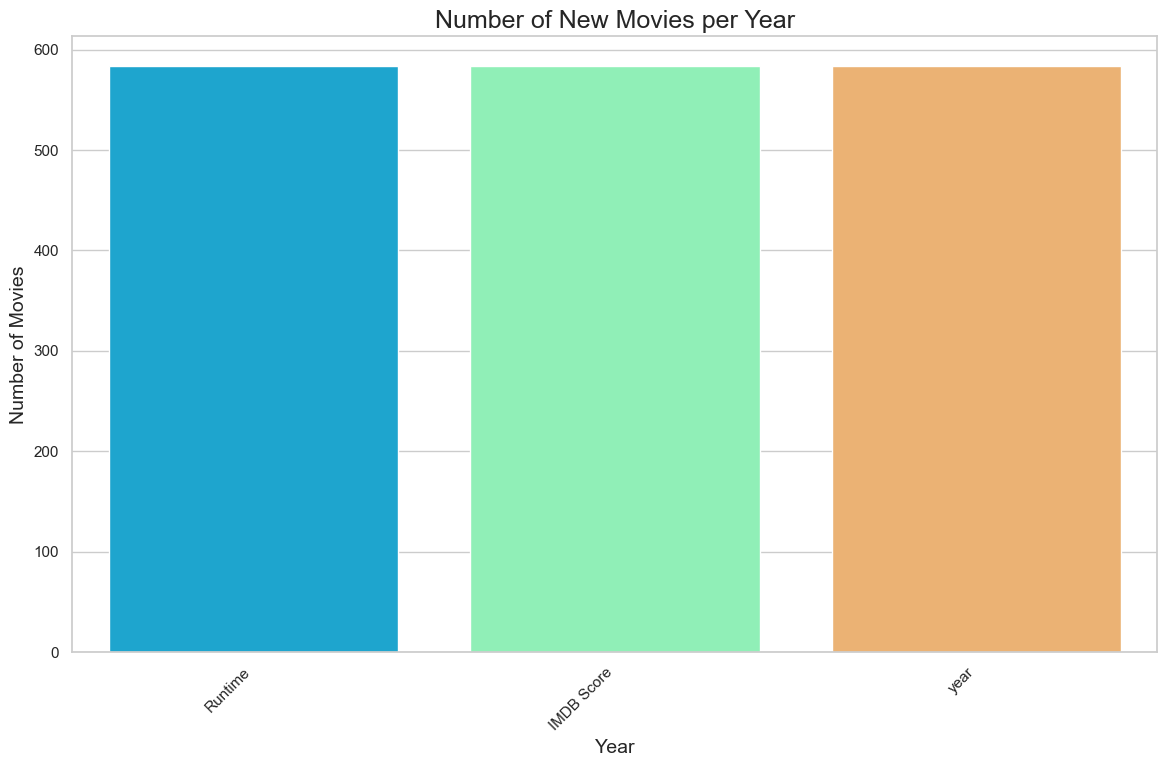

In [97]:
sns.set(style="whitegrid", rc={'figure.figsize':(14, 8)})
ax = sns.countplot(data=df.sort_values('year'), palette='rainbow')
ax.set_title('Number of New Movies per Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

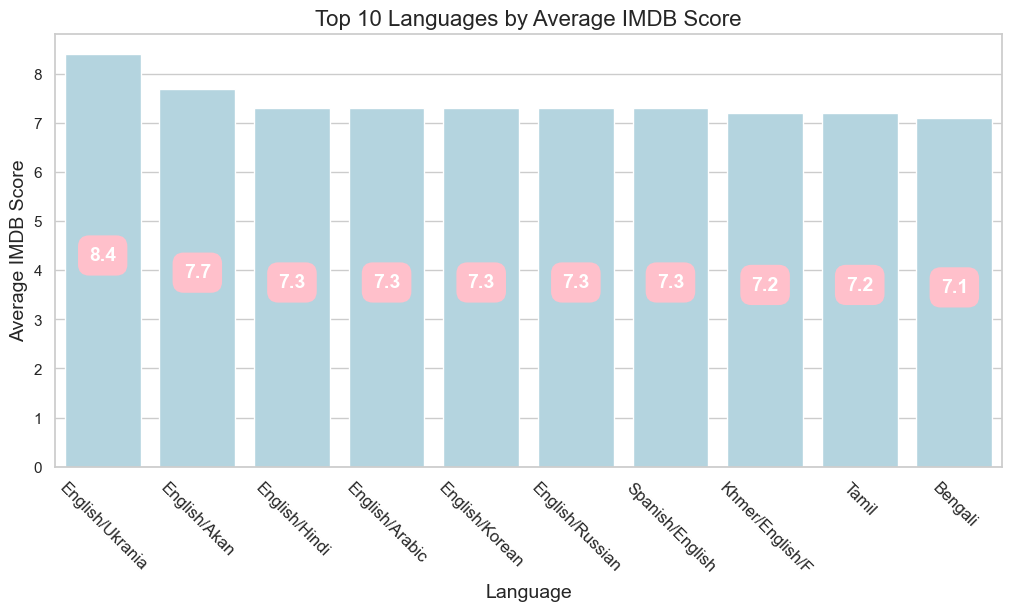

In [98]:
df_temp = df.groupby(['Language'])[['IMDB Score']].mean().sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:10,:]
fig, ax = plt.subplots(1, 1, figsize=(10, 6), constrained_layout=True)
sns.barplot(x='Language', y='IMDB Score', data=df_temp, color='lightblue', ax=ax)
for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, 
            y = i.get_height()/2,
            s = f"{round(i.get_height(), 1)}", 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))
ax.set_xlabel('Language', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticks(range(len(df_temp)))
ax.set_xticklabels([str(i)[:15] for i in df_temp['Language']], fontsize=12, rotation=-45)
plt.title('Top 10 Languages by Average IMDB Score', fontsize=16)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12328\3181359401.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




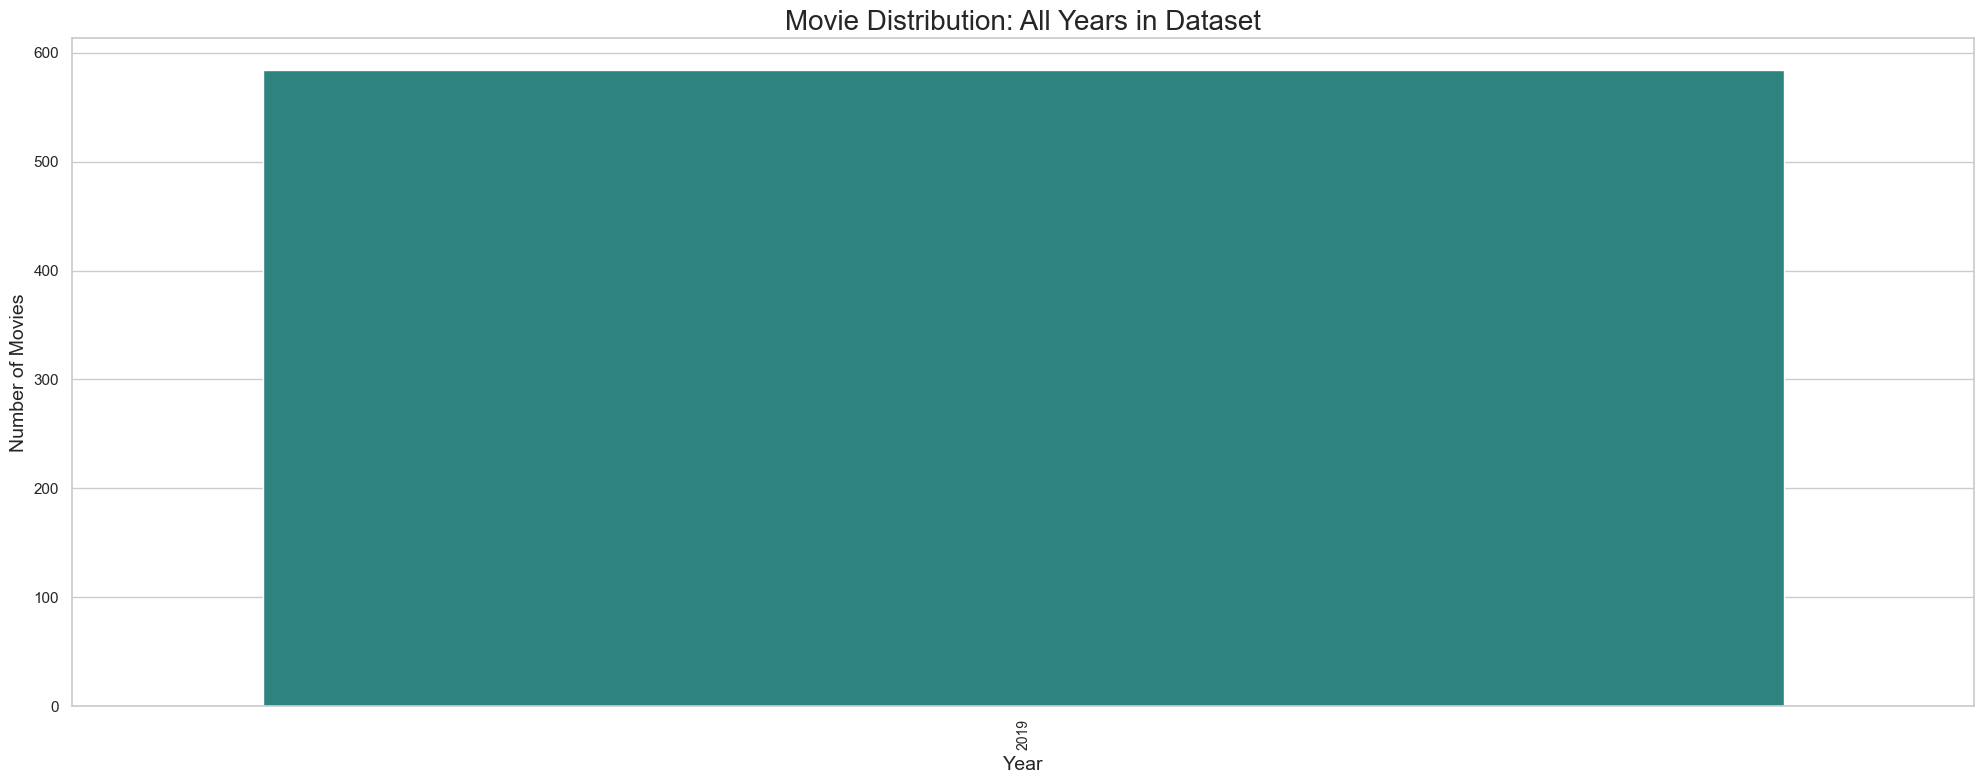

In [133]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df.sort_values('year'), x='year', palette='viridis')
plt.xticks(rotation=90, fontsize=10)
plt.title('Movie Distribution: All Years in Dataset', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.tight_layout()
plt.show()

In [119]:
df_run= df[df["year"] ==2019]
df_run.Runtime.mean()

np.float64(93.57705479452055)

In [120]:
genre_lang =[]
for i in df.Language.unique():
    df_lang =df[df["Language"]==i]
    df_lang_genre =df_lang.Genre.value_counts().nlargest(1)
    genre_lang.append((i,df_lang_genre))

In [121]:
df_lang = pd.DataFrame(genre_lang, columns = ['Language', 'Genre'])
df_lang.sort_values(by=['Language'],ignore_index=True)

,Language,Genre
0,Bengali,"Genre Documentary 1 Name: count, dtype: int64"
1,Dutch,"Genre Romantic comedy 1 Name: count, dtype:..."
2,English,"Genre Documentary 120 Name: count, dtype: i..."
3,English/Akan,"Genre War drama 1 Name: count, dtype: int64"
4,English/Arabic,"Genre Documentary 1 Name: count, dtype: int64"
5,English/Hindi,"Genre Documentary 2 Name: count, dtype: int64"
6,English/Japanese,"Genre Documentary 1 Name: count, dtype: int64"
7,English/Korean,"Genre Action-adventure 1 Name: count, dtype..."
8,English/Mandarin,"Genre Documentary 2 Name: count, dtype: int64"
9,English/Russian,"Genre Documentary 1 Name: count, dtype: int64"


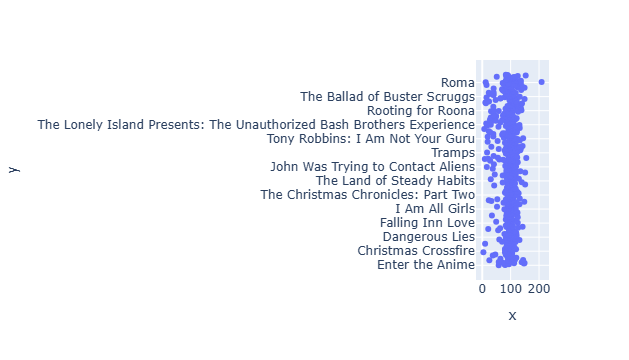

In [122]:
fig = px.scatter(x=df['Runtime'], y=df['Title'])
fig.show()
     